In [1]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    compress_repeated_epochs,
    batch_analysis,
    add_new_deep_sup,
    custom_plots
)
from ripple_heterogeneity.replay import replay_fig
from ad_ied.replay import replay_run
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random
from matplotlib.ticker import AutoMinorLocator

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'D:\github\ad_ied\results'


In [61]:
# basepath = r"X:\AD_sessions\AD_10_sess25\AZ10_210806_sess25"
basepath = r"X:\\AD_sessions\\AD_10_sess25\\Naz1_210324_sess5"
epoch_df = loading.load_epoch(basepath)
beh_epochs = nel.EpochArray([np.array([epoch_df.startTime, epoch_df.stopTime]).T])
st,cm = loading.load_spikes(basepath,putativeCellType="Pyr",brainRegion="CA1")
pos, right_epochs, left_epochs, states, position_df_no_nan = replay_run.get_pos(basepath, epoch_df, beh_epochs, 1)



In [62]:
ds_50ms=0.05
speed_thres=3
s_binsize=3
tuning_curve_sigma=3
place_cell_min_spks=100
place_cell_peak_mean_ratio=1.5
place_cell_min_rate=1

tc, st_run, bst_run = replay_run.get_tuning_curves(
    pos, st, left_epochs, speed_thres, ds_50ms, s_binsize, tuning_curve_sigma
)
(
    sta_placecells,
    tc,
    bst_run,
    cell_metrics_,
    total_units,
) = replay_run.restrict_to_place_cells(
    tc,
    st_run,
    bst_run,
    st,
    cm,
    place_cell_min_spks,
    place_cell_min_rate,
    place_cell_peak_mean_ratio,
)

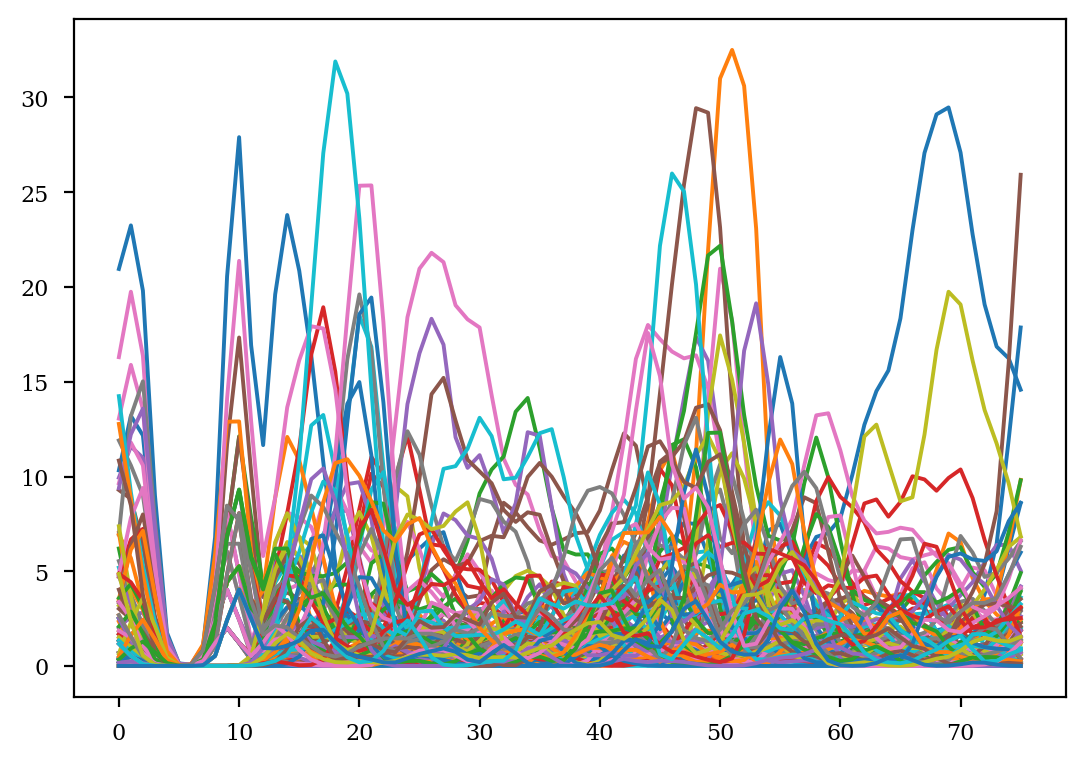

In [63]:
plt.plot(tc.ratemap.T)
plt.show()


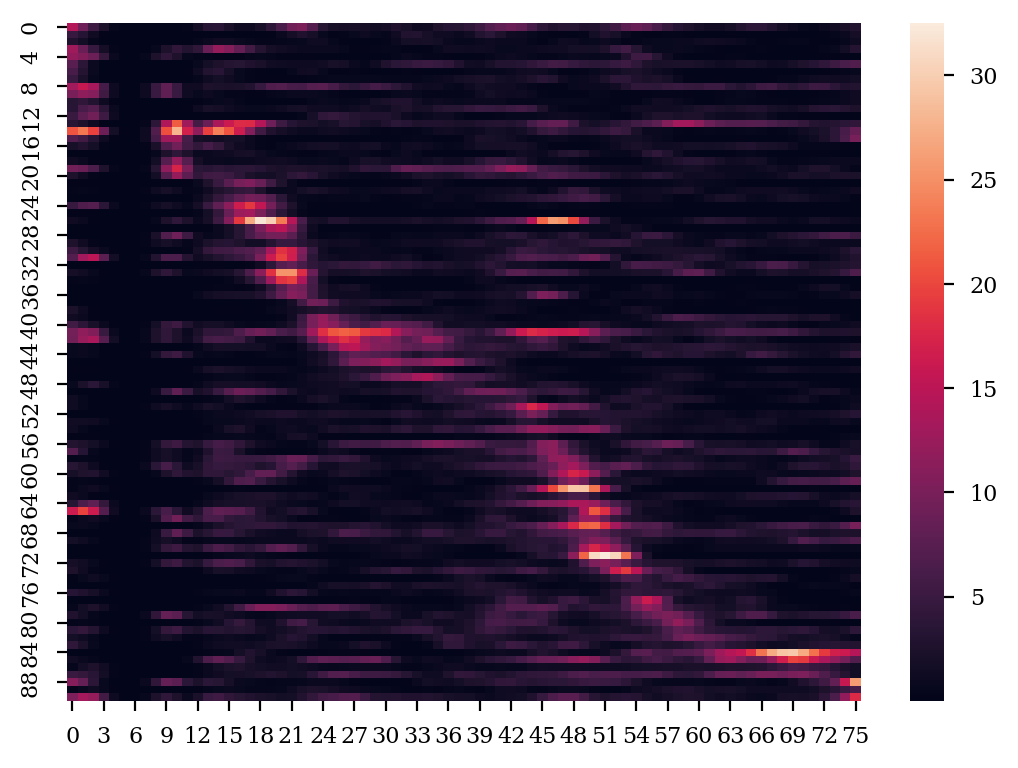

In [64]:
sns.heatmap(tc.reorder_units().ratemap)
plt.show()

<AxesSubplot: xlabel='x', ylabel='y'>

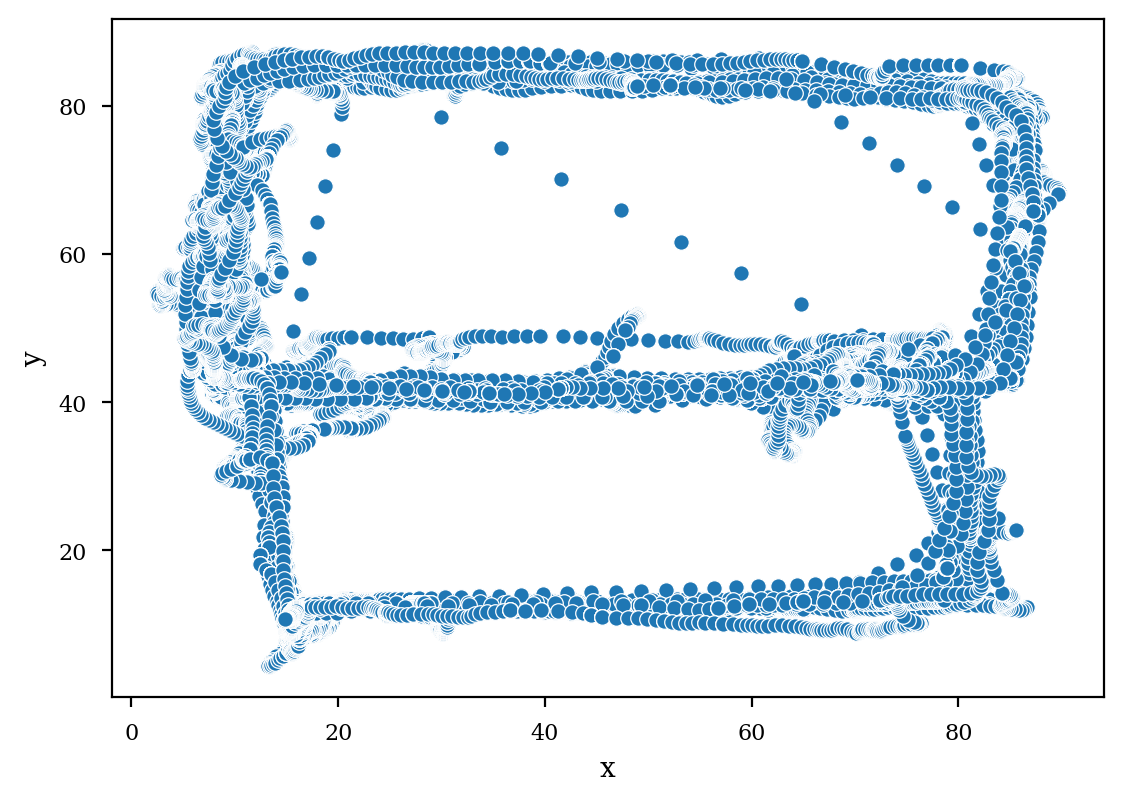

In [65]:
sns.scatterplot(data=position_df_no_nan,x="x",y="y")

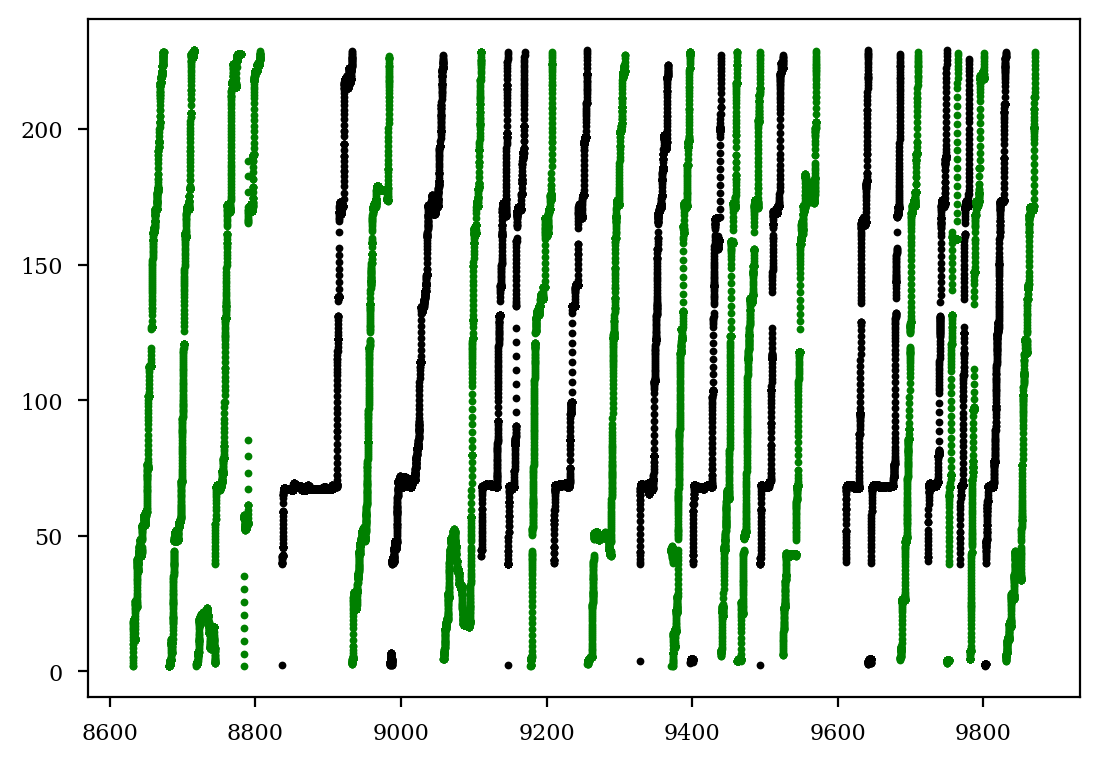

In [66]:
plt.plot(pos[left_epochs].abscissa_vals, pos[left_epochs].data.T,'.k')
plt.plot(pos[right_epochs].abscissa_vals, pos[right_epochs].data.T,'.g')

plt.show()

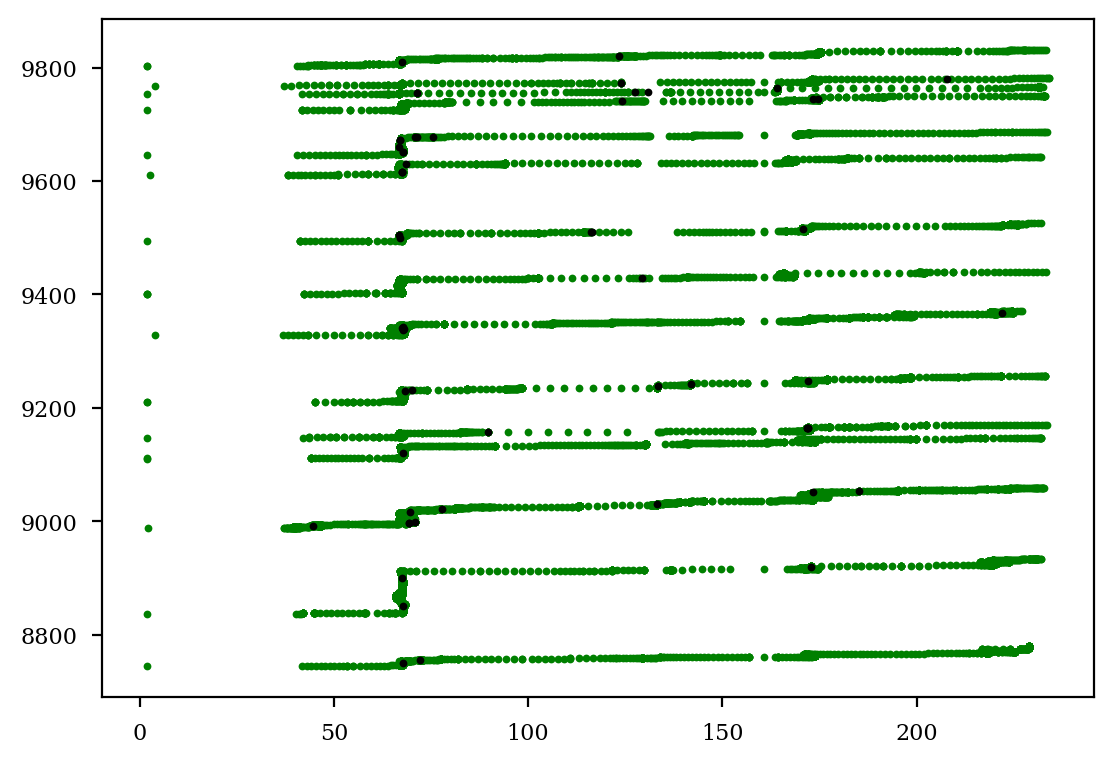

In [51]:
# plt.plot(pos[right_epochs].abscissa_vals ,pos[right_epochs].data.T)
# plt.show()
plt.plot(pos[left_epochs].data.T,pos[left_epochs].abscissa_vals,'.g')
x = np.interp(st[left_epochs].data[0],pos[left_epochs].abscissa_vals,pos[left_epochs].data[0])
plt.plot(x,st[left_epochs].data[0],'.k')

In [12]:
st.data[0]

array([3.22000000e-02, 1.01695000e+00, 1.11860000e+00, ...,
       1.77198129e+04, 1.77198489e+04, 1.77198577e+04])